In [5]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
from scipy import stats
import mjoindices.olr_handling as olr
import mjoindices.omi.wheeler_kiladis_mjo_filter
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.mon.mean.nc')
ds = f.olr
nds = ds.loc['1981-01-01':'2021-12-01',5:-5.1,120:180.1].mean(axis=(1,2))

In [6]:
nino = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\nino3.4.nc')
nino34 = nino.sst.loc['1981-01-01':'2021-12-01']
ds = nino34

In [7]:
climatology_mean = ds.groupby("time.month").mean("time")
climatology_std = ds.groupby("time.month").std("time")
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds.groupby("time.month"),
    climatology_mean,
    climatology_std,
)

nino34 = stand_anomalies

In [8]:
nino34month = nino34.resample(time='QS-NOV').mean(dim="time")

ninoNDJ=nino34month[4::4]
ninoNDJ['time']=ninoNDJ['time.year']
ninoNDJ=ninoNDJ.rename({'time': 'Year'})
print(ninoNDJ.size)
olr = nds.resample(time='QS-NOV').mean(dim="time")

olrNDJ = olr[4::4]
olrNDJ['time']=olrNDJ['time.year']
olrNDJ=olrNDJ.rename({'time': 'Year'})
print(olrNDJ.size)

41
41


In [9]:
print(olrNDJ.size)

41


In [10]:
t = nino34.time
t

<xarray.DataArray 'time' (time: 492)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

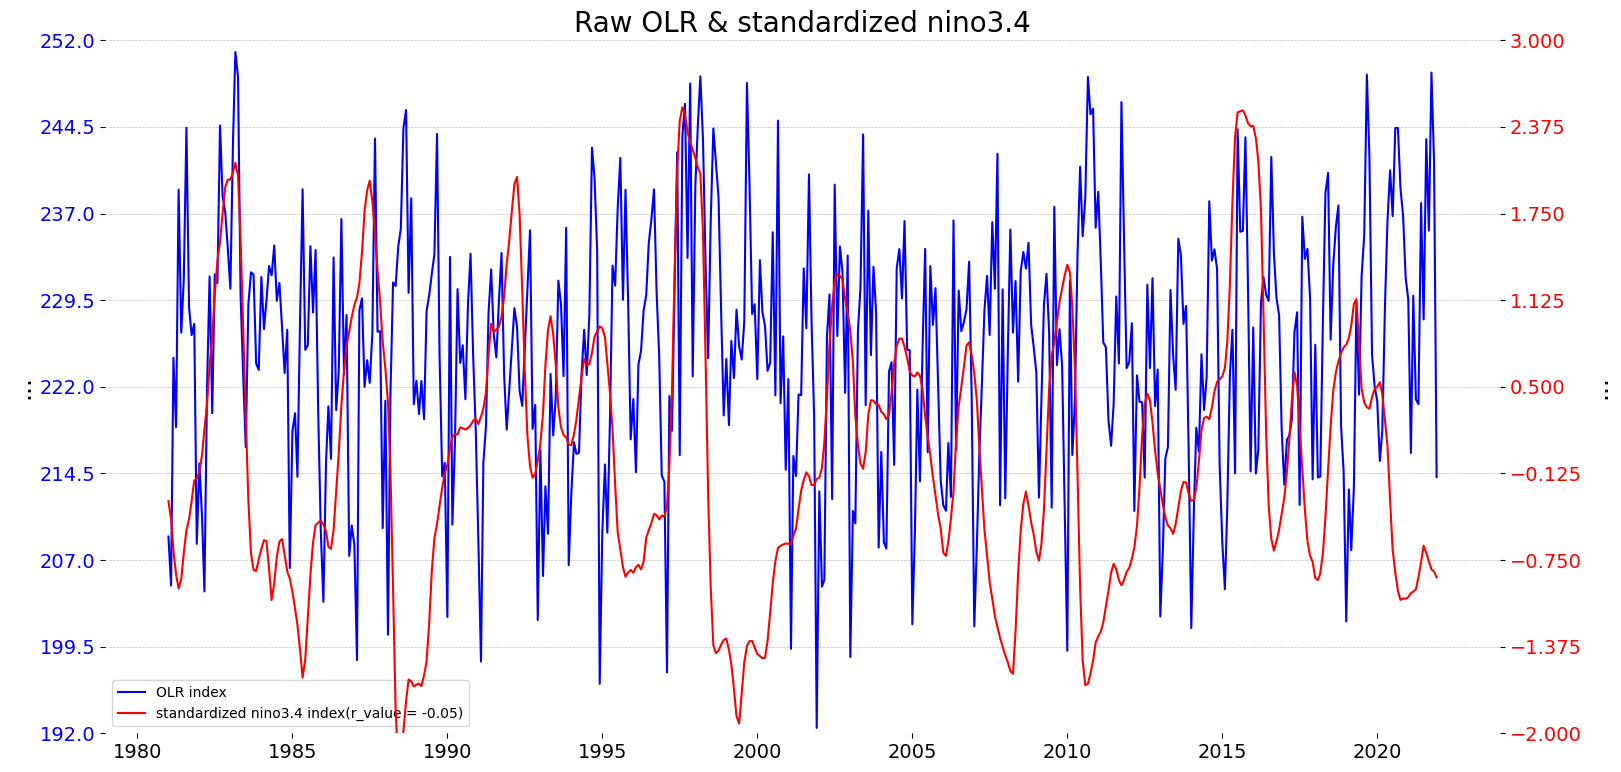

In [11]:
fig, ax1 = plt.subplots(figsize=(18,9))
title = ('Raw OLR & standardized nino3.4')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(t,nds,'b',label='OLR index')
ax1.set_ylabel('...', fontsize = 18)
ax1.set_ylim(192,252)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(t,nino34,'r',label='standardized nino3.4 index(r_value = -0.05)')
ax2.set_ylabel('...',fontsize=18)
ax2.set_ylim(-2,3)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')                    

lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       

In [12]:
res = stats.linregress(nds,nino34)
print(res)

LinregressResult(slope=-0.004790758730799757, intercept=1.0795755086794858, rvalue=-0.05183195980901699, pvalue=0.25116034011658805, stderr=0.004169888737612132, intercept_stderr=0.9407476870480314)


In [13]:
t = olrNDJ.Year

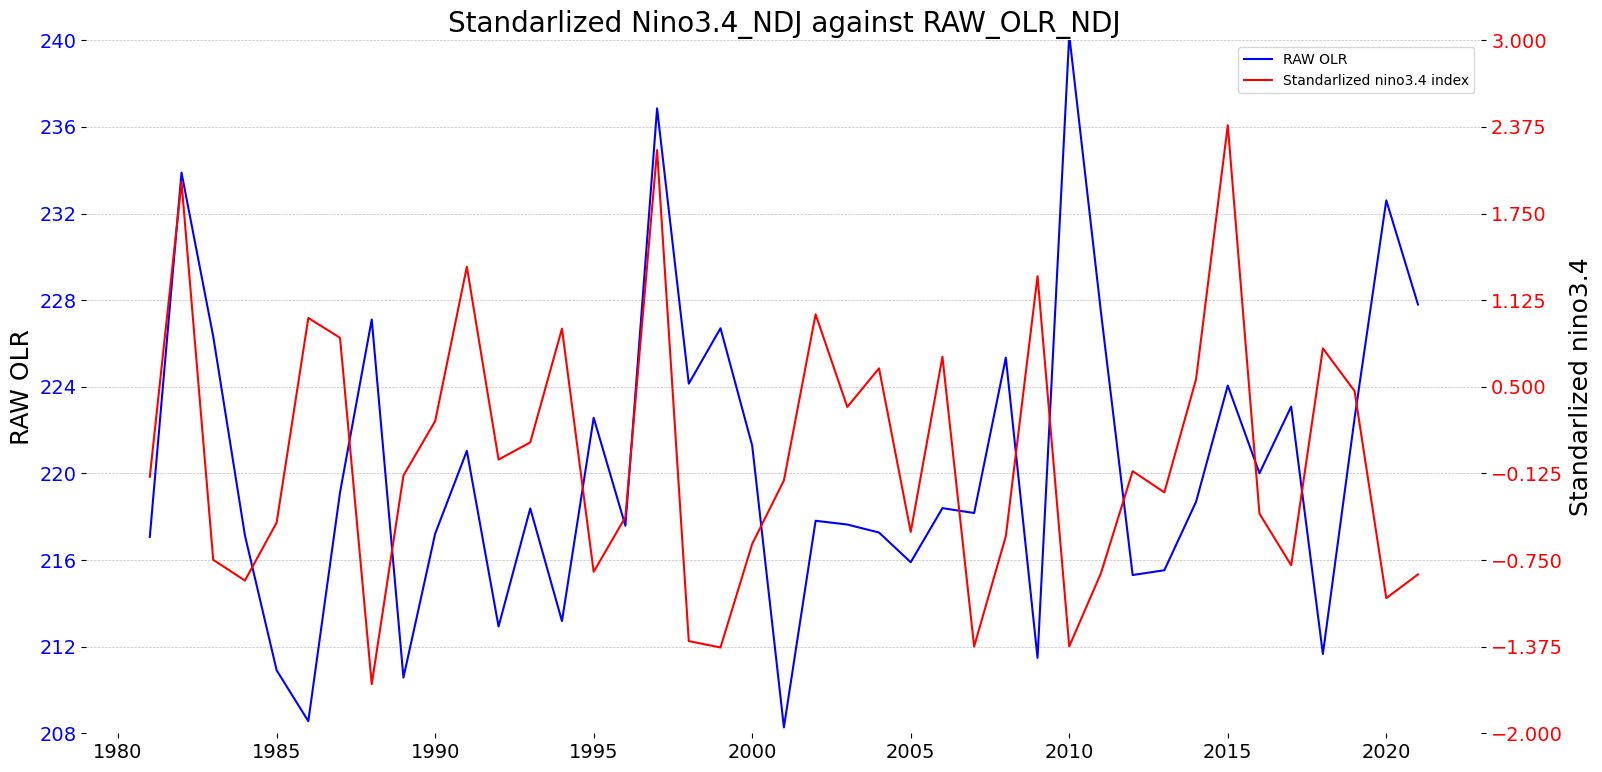

In [14]:
fig, ax1 = plt.subplots(figsize=(18,9))
title = ('Standarlized Nino3.4_NDJ against RAW_OLR_NDJ')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(t,olrNDJ,'b',label='RAW OLR')
ax1.set_ylabel('RAW OLR', fontsize = 18)
ax1.set_ylim(208,240)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(t,ninoNDJ,'r',label='Standarlized nino3.4 index')
ax2.set_ylabel('Standarlized nino3.4',fontsize=18)
ax2.set_ylim(-2,3)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')                    

lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False) 

In [30]:
res = stats.linregress(olrNDJ,ninoNDJ)
print(res)

LinregressResult(slope=-0.019014479227159195, intercept=4.184382167157707, rvalue=-0.13855606743786056, pvalue=0.387624753303236, stderr=0.021762926864204554, intercept_stderr=4.796756249423116)
